In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Uploading csv
df = pd.read_csv('ilanlarson3.csv')


In [3]:
#First 10 rows of data
df.head(10)

,Price,City,Town,Neighbourhood,Total Square of Meter,Number of room,Number of floor,Floor of home,Credi Accepting,Kombi Doğalgaz Heating
0,999.00,Ankara,Keçiören,Karakaya Mahallesi,150,5.0,4,4,Evet,1
1,990.00,Ankara,Mamak,Akşemsettin Mahallesi,150,4.0,14,9,Evet,1
2,990.00,Ankara,Keçiören,Bağlarbaşı Mahallesi,120,4.0,3,2,Evet,1
3,977.00,Ankara,Mamak,Fahri Korutürk Mahallesi,135,4.0,12,-1,Evet,1
4,975.00,Ankara,Çankaya,Yaşamkent Mahallesi,160,5.0,15,7,Evet,0
5,975.00,Ankara,Etimesgut,Süvari Mahallesi,105,3.0,4,1,Evet,1
6,970.00,Ankara,Keçiören,Osmangazi Mahallesi,125,4.0,3,1,Evet,1
7,969.00,Ankara,Keçiören,Uyanış Mahallesi,130,4.0,3,1,Evet,1
8,965.00,Ankara,Keçiören,Kanuni Mahallesi,110,3.0,3,1,Evet,1
9,965.00,Ankara,Keçiören,Bağlarbaşı Mahallesi,100,3.0,2,0.5,Evet,1


In [4]:
# General information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   11311 non-null  object 
 1   City                    11311 non-null  object 
 2   Town                    11311 non-null  object 
 3   Neighbourhood           11311 non-null  object 
 4   Total Square of Meter   11311 non-null  object 
 5   Number of room          11311 non-null  float64
 6   Number of floor         11311 non-null  int64  
 7   Floor of home           11311 non-null  object 
 8   Credi Accepting         11311 non-null  object 
 9   Kombi Doğalgaz Heating  11311 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 883.8+ KB


In [5]:
df.isnull().sum()

Price                     0
City                      0
Town                      0
Neighbourhood             0
Total Square of Meter     0
Number of room            0
Number of floor           0
Floor of home             0
Credi Accepting           0
Kombi Doğalgaz Heating    0
dtype: int64

In [6]:
#DATA SCIENCE

In [7]:
# Remove dots and convert to numeric format
df['Price'] = df['Price'].str.replace('.', '').astype(float)

# Get unique values
unique_values = df['Price'].unique()

anormal_deger = []


for price in unique_values:
    if price < 1100000 or price > 15000000:
        anormal_deger.append(price)
    

# Remove rows containing abnormal values ​​from the data set
df = df[~df['Price'].isin(anormal_deger)]

# Check updated dataset
unique_values = df['Price'].unique()


In [8]:
unique_values = df['City'].unique()

print(unique_values)


['Ankara' 'Antalya' 'Bursa' 'İstanbul' 'İzmir' 'Kocaeli' 'Konya' 'Muğla']


In [9]:
# Calculating the number of observations for each district
town_counts = df['Town'].value_counts()

# Identifying districts with fewer than 10 observations
small_towns = town_counts[town_counts < 5].index

# Remove these counties from the data set
df = df[~df['Town'].isin(small_towns)]

# Check updated dataset
print(df['Town'].value_counts())

Town
Selçuklu    738
Nilüfer     527
Alanya      411
Kepez       374
Dalaman     365
           ... 
Bayındır      6
Beşiktaş      6
Ilgın         5
Akyurt        5
Urla          5
Name: count, Length: 125, dtype: int64


In [10]:
# Calculating the number of observations for each district
town_counts = df['Neighbourhood'].value_counts()

# Identifing districts with fewer than 10 observations 
small_towns = town_counts[town_counts < 2].index

# Removing these counties from the data set
df = df[~df['Neighbourhood'].isin(small_towns)]

# Checking the updated dataset
print(df['Neighbourhood'].value_counts())

Neighbourhood
Cumhuriyet Mahallesi            217
Merkez Mahallesi                142
Dumlupınar Mahallesi            139
Mahmutlar Mahallesi             131
Hürriyet Mahallesi              122
                               ... 
Tevfik Bey Mahallesi              2
Aziz Mahmut Hüdayi Mahallesi      2
Başakşehir Mahallesi              2
Feyzullah Mahallesi               2
Bozalan Mahallesi                 2
Name: count, Length: 1031, dtype: int64


In [11]:

# remove dots in column
df['Total Square of Meter'] = df['Total Square of Meter'].str.replace('.', '').astype(float)

unique_values = df['Total Square of Meter'].unique()

print(unique_values)


[2.55000000e+02 1.80000000e+02 1.15000000e+02 1.65000000e+02
 1.20000000e+02 1.60000000e+02 1.75000000e+02 1.30000000e+02
 8.00000000e+01 1.85000000e+02 6.00000000e+01 2.10000000e+02
 1.05000000e+02 1.45000000e+02 1.00000000e+02 1.40000000e+02
 7.50000000e+01 1.10000000e+02 9.00000000e+01 1.35000000e+02
 2.20000000e+02 7.20000000e+01 1.50000000e+02 1.25000000e+02
 2.40000000e+02 9.80000000e+01 3.05000000e+02 2.70000000e+02
 8.50000000e+01 1.17000000e+02 1.95000000e+02 1.32000000e+02
 3.00000000e+02 2.50000000e+02 1.55000000e+02 2.65000000e+02
 1.70000000e+02 1.02000000e+02 1.64000000e+02 1.90000000e+02
 1.69000000e+02 2.00000000e+02 1.37000000e+02 2.90000000e+02
 2.60000000e+02 1.38000000e+02 9.10000000e+01 2.25000000e+02
 7.00000000e+01 1.76000000e+02 9.60000000e+01 9.70000000e+01
 8.30000000e+01 1.16000000e+02 8.90000000e+01 1.66000000e+02
 5.00000000e+01 2.05000000e+02 3.65000000e+02 1.47000000e+02
 1.49000000e+02 9.50000000e+01 2.00000000e+03 3.50000000e+02
 3.20000000e+02 1.720000

In [12]:
anormal_deger = []
for meter in unique_values:

    
    if meter < 100 or meter > 500 :
        anormal_deger.append(meter)


# Removing rows containing abnormal values ​​from the data set
df = df[~df['Total Square of Meter'].isin(anormal_deger)]

# Checking updated dataset
unique_values = df['Total Square of Meter'].unique()
print(unique_values)


[255. 180. 115. 165. 120. 160. 175. 130. 185. 210. 105. 145. 100. 140.
 110. 135. 220. 150. 125. 240. 305. 270. 117. 195. 132. 300. 250. 155.
 265. 170. 102. 164. 190. 169. 200. 137. 290. 260. 138. 225. 176. 116.
 166. 205. 365. 147. 149. 350. 320. 172. 280. 216. 215. 325. 113. 450.
 142. 330. 143. 103. 136. 285. 275. 118. 128. 124. 148. 168. 230. 129.
 112. 198. 293. 131. 139. 258. 156. 106. 167. 245. 126. 109. 122. 235.
 108. 193. 133. 183. 162. 233. 157. 123. 370. 254. 144. 208. 153. 104.
 101. 107. 152. 335. 218. 257. 191. 181. 249. 222. 298. 161. 163. 197.
 158. 187. 111. 154. 177. 213. 159. 194. 151. 301. 337. 231. 253. 317.
 173. 482. 114. 127. 266. 134. 278. 217. 311. 348. 207. 141. 196. 192.
 189. 500. 238. 179. 316. 247. 121. 358. 480. 174. 333. 272. 182. 361.
 178. 380. 206. 146. 228. 199. 251. 203. 119. 184. 248. 321. 202. 286.
 188. 226. 236. 209. 328. 186. 310. 405. 219. 400. 227. 224. 295. 406.
 315. 460. 313. 252.]


In [13]:
df['Total Square of Meter'].value_counts()

Total Square of Meter
120.0    632
100.0    615
110.0    612
130.0    589
140.0    429
        ... 
337.0      1
199.0      1
301.0      1
258.0      1
252.0      1
Name: count, Length: 186, dtype: int64

In [14]:
unique_values = df['Number of room'].unique()

print(unique_values)

[ 4.   3.   5.   6.   5.5  7.   4.5  8.   2.5  2.   3.5 10.   9.   1. ]


In [15]:
df['Number of room'].value_counts()

Number of room
4.0     4152
3.0     2193
5.0      791
6.0      232
7.0       71
4.5       59
2.0       46
8.0       26
3.5       26
5.5       13
9.0        3
2.5        2
10.0       2
1.0        2
Name: count, dtype: int64

In [16]:
# List of anormal values ​​to use to delete rows containing anormal values
anormal_degerler = [12, 10, 1, 2.5,9 ,5.5, 8, 3.5, 4.5, 7]

# Removing rows containing abnormal values ​​from the data set
df = df[~df['Number of room'].isin(anormal_degerler)]

# Checking the updated dataset
unique_values = df['Number of room'].unique()
print(unique_values)


df['Number of room'].value_counts()

[4. 3. 5. 6. 2.]


Number of room
4.0    4152
3.0    2193
5.0     791
6.0     232
2.0      46
Name: count, dtype: int64

In [17]:
unique_values = df['Floor of home'].unique()

print(unique_values)

df['Floor of home'].value_counts()

['1' '5' '-1' '4' '2' '3' '11' '0.5' '-2' '9' '0' '6' '14' '10' '7' '13'
 '-3' '12' '17' '8' '27' '-4' '18' 'Bahçe Dublex' '16' '26' 'Villa Tipi'
 '20' '15' '19' 'Müstakil' '25' '21' '22']


Floor of home
2               1753
3               1467
1                980
4                858
0.5              620
0                442
5                417
6                203
7                110
-1                85
8                 72
Bahçe Dublex      63
9                 55
-2                46
10                42
Müstakil          34
-3                30
Villa Tipi        25
11                25
12                22
13                17
-4                16
14                 8
17                 5
15                 4
18                 3
16                 3
20                 3
27                 1
26                 1
19                 1
25                 1
21                 1
22                 1
Name: count, dtype: int64

In [18]:
# List of anormal values ​​to use to delete rows containing anormal values
anormal_degerler = ['Müstakil', 'Villa Tipi', '10', '-3', '9', '-2', '8', 'Bahçe Dublex']

# Removing rows containing abnormal values ​​from the data set
df = df[~df['Floor of home'].isin(anormal_degerler)]


# Checking the updated dataset
unique_values = df['Floor of home'].unique()
print(unique_values)


df['Floor of home'].value_counts()

['1' '5' '-1' '4' '2' '3' '11' '0.5' '0' '6' '14' '7' '13' '12' '17' '27'
 '-4' '18' '16' '26' '20' '15' '19' '25' '21' '22']


Floor of home
2      1753
3      1467
1       980
4       858
0.5     620
0       442
5       417
6       203
7       110
-1       85
11       25
12       22
13       17
-4       16
14        8
17        5
15        4
18        3
16        3
20        3
27        1
26        1
19        1
25        1
21        1
22        1
Name: count, dtype: int64

In [19]:
# Function that categorizes floors
def categorize_floor(floor):
    try:
        floor = int(floor)
        if floor < 0:
            return 'Zemin Altı'
        elif floor == 0:
            return 'Giriş Katı'
        elif floor <= 2:
            return 'Alt Katlar'
        elif floor <= 5:
            return 'Orta Katlar'
        else:
            return 'Üst Katlar'
    except ValueError:
        return 'Özel Değer'

# Categorizing the 'Floor of home' column
df['Floor Category'] = df['Floor of home'].apply(categorize_floor)

# Check for changes
print(df['Floor Category'].value_counts())

# Converting 'Floor Category' column with one-hot encoding
df = pd.get_dummies(df, columns=['Floor Category'], prefix='Floor')

# View the updated data frame
print(df.head())


Floor Category
Orta Katlar    2742
Alt Katlar     2733
Özel Değer      620
Giriş Katı      442
Üst Katlar      409
Zemin Altı      101
Name: count, dtype: int64
          Price    City         Town        Neighbourhood  \
182  15000000.0  Ankara    Etimesgut    Bağlıca Mahallesi   
183  15000000.0  Ankara  Yenimahalle  Güventepe Mahallesi   
184  15000000.0  Ankara     Keçiören   Ufuktepe Mahallesi   
185  15000000.0  Ankara    Etimesgut    Bağlıca Mahallesi   
186  15000000.0  Ankara       Sincan   İstasyon Mahallesi   

     Total Square of Meter  Number of room  Number of floor Floor of home  \
182                  255.0             4.0                4             1   
183                  180.0             4.0               15             5   
184                  115.0             3.0                3            -1   
185                  165.0             5.0                8             1   
186                  120.0             4.0                4             4   

    Credi

In [20]:
unique_values = df['Credi Accepting'].unique()

print(unique_values)
df['Credi Accepting'].value_counts()

['Evet' 'Hayır' 'Bilinmiyor']


Credi Accepting
Evet          5933
Hayır          741
Bilinmiyor     373
Name: count, dtype: int64

In [21]:
# Changing 'Unknown' to 'Yes' in the 'Credit Accepting' column
df['Credi Accepting'] = df['Credi Accepting'].replace('Bilinmiyor', 'Evet')

# printing unique values ​​and numbers again
unique_values = df['Credi Accepting'].unique()
print(unique_values)
print(df['Credi Accepting'].value_counts())


['Evet' 'Hayır']
Credi Accepting
Evet     6306
Hayır     741
Name: count, dtype: int64


In [22]:
# General information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7047 entries, 182 to 11202
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   7047 non-null   float64
 1   City                    7047 non-null   object 
 2   Town                    7047 non-null   object 
 3   Neighbourhood           7047 non-null   object 
 4   Total Square of Meter   7047 non-null   float64
 5   Number of room          7047 non-null   float64
 6   Number of floor         7047 non-null   int64  
 7   Floor of home           7047 non-null   object 
 8   Credi Accepting         7047 non-null   object 
 9   Kombi Doğalgaz Heating  7047 non-null   int64  
 10  Floor_Alt Katlar        7047 non-null   bool   
 11  Floor_Giriş Katı        7047 non-null   bool   
 12  Floor_Orta Katlar       7047 non-null   bool   
 13  Floor_Zemin Altı        7047 non-null   bool   
 14  Floor_Özel Değer        7047 non-null   bo

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [24]:
df['Town'] = le.fit_transform(df.Town)

In [25]:
le.classes_

array(['Aksu', 'Akyurt', 'Akşehir', 'Alanya', 'Aliağa', 'Altındağ',
       'Arnavutköy', 'Ataşehir', 'Avcılar', 'Bahçelievler', 'Bakırköy',
       'Balçova', 'Bayraklı', 'Bayrampaşa', 'Bayındır', 'Bağcılar',
       'Başakşehir', 'Başiskele', 'Bergama', 'Beylikdüzü', 'Beyşehir',
       'Beşiktaş', 'Bodrum', 'Bornova', 'Buca', 'Büyükçekmece', 'Dalaman',
       'Darıca', 'Datça', 'Derince', 'Dikili', 'Döşemealtı', 'Ereğli',
       'Esenler', 'Esenyurt', 'Etimesgut', 'Eyüpsultan', 'Fatih',
       'Fethiye', 'Finike', 'Foça', 'Gaziemir', 'Gaziosmanpaşa',
       'Gazipaşa', 'Gebze', 'Gemlik', 'Gölbaşı', 'Gölcük', 'Güngören',
       'Gürsu', 'Güzelbahçe', 'Ilgın', 'Kadıköy', 'Kandıra', 'Karabağlar',
       'Karacabey', 'Karamürsel', 'Karatay', 'Kartal', 'Kartepe',
       'Karşıyaka', 'Kağıthane', 'Kemalpaşa', 'Kepez', 'Kestel',
       'Keçiören', 'Konak', 'Konyaaltı', 'Kumluca', 'Körfez', 'Köyceğiz',
       'Küçükçekmece', 'Maltepe', 'Mamak', 'Manavgat', 'Marmaris',
       'Menderes', 'Meneme

In [26]:
df

,Price,City,Town,Neighbourhood,Total Square of Meter,Number of room,Number of floor,Floor of home,Credi Accepting,Kombi Doğalgaz Heating,Floor_Alt Katlar,Floor_Giriş Katı,Floor_Orta Katlar,Floor_Zemin Altı,Floor_Özel Değer,Floor_Üst Katlar
182,15000000.0,Ankara,35,Bağlıca Mahallesi,255.0,4.0,4,1,Evet,0,True,False,False,False,False,False
183,15000000.0,Ankara,108,Güventepe Mahallesi,180.0,4.0,15,5,Evet,0,False,False,True,False,False,False
184,15000000.0,Ankara,65,Ufuktepe Mahallesi,115.0,3.0,3,-1,Evet,1,False,False,False,True,False,False
185,15000000.0,Ankara,35,Bağlıca Mahallesi,165.0,5.0,8,1,Evet,1,True,False,False,False,False,False
186,15000000.0,Ankara,101,İstasyon Mahallesi,120.0,4.0,4,4,Evet,1,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11193,1100000.0,Muğla,38,Patlangıç Mahallesi,100.0,3.0,3,1,Hayır,0,True,False,False,False,False,False
11194,1100000.0,Muğla,38,Karaçulha Mahallesi,110.0,4.0,2,2,Hayır,0,True,False,False,False,False,False
11195,1100000.0,Muğla,38,Taşyaka Mahallesi,110.0,4.0,2,2,Evet,0,True,False,False,False,False,False
11198,1100000.0,Muğla,80,Emek Mahallesi,100.0,3.0,3,2,Evet,0,True,False,False,False,False,False


In [27]:
df["City"] = le.fit_transform(df.City)
df["Neighbourhood"] = le.fit_transform(df.Neighbourhood)
df["Floor of home"] = le.fit_transform(df["Floor of home"])
df["Credi Accepting"] = le.fit_transform(df["Credi Accepting"])
df["Number of room"] = le.fit_transform(df["Number of room"])



In [28]:
df

,Price,City,Town,Neighbourhood,Total Square of Meter,Number of room,Number of floor,Floor of home,Credi Accepting,Kombi Doğalgaz Heating,Floor_Alt Katlar,Floor_Giriş Katı,Floor_Orta Katlar,Floor_Zemin Altı,Floor_Özel Değer,Floor_Üst Katlar
182,15000000.0,0,35,153,255.0,2,4,4,0,0,True,False,False,False,False,False
183,15000000.0,0,108,341,180.0,2,15,23,0,0,False,False,True,False,False,False
184,15000000.0,0,65,751,115.0,1,3,0,0,1,False,False,False,True,False,False
185,15000000.0,0,35,153,165.0,3,8,4,0,1,True,False,False,False,False,False
186,15000000.0,0,101,935,120.0,2,4,22,0,1,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11193,1100000.0,5,38,616,100.0,1,3,4,1,0,True,False,False,False,False,False
11194,1100000.0,5,38,432,110.0,2,2,14,1,0,True,False,False,False,False,False
11195,1100000.0,5,38,717,110.0,2,2,14,0,0,True,False,False,False,False,False
11198,1100000.0,5,80,245,100.0,1,3,14,0,0,True,False,False,False,False,False


In [29]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Encode categorical variables
data = pd.get_dummies(df, columns=['City', 'Town', 'Neighbourhood', 'Credi Accepting', 'Kombi Doğalgaz Heating'], drop_first=True)

# Feature selection
features = ['Total Square of Meter', 'Number of room', 'Number of floor', 'Floor of home'] + [col for col in data.columns if col.startswith(('City', 'Town', 'Neighbourhood', 'Credi Accepting', 'Kombi Doğalgaz Heating'))]
X = data[features]
y = data['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# XGBoost model training
xgb_model = XGBRegressor(n_estimators=210, random_state=50)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)




In [30]:


# Mean Absolute Percentage Error (MAPE) calculating
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# MAPE calculating
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 7.19%


In [31]:
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Save actual and predicted prices to a new CSV file
results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# CSV dosyasına yazma
results.to_csv('y_test_y_pred_results_xgboost.csv', index=False)
print("Results saved to y_test_y_pred_results_xgboost.csv")

Mean Absolute Error: 343439.2495567376
Results saved to y_test_y_pred_results_xgboost.csv


In [32]:
from sklearn.metrics import r2_score
# Calculating R-square
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.845317373669032


In [33]:
# Price ranges and MAE calculation

price_ranges = [(0, 2), (2, 4), (4, 6), (6, 8), (8, 10), (10, 12), (12, 14), (14,16)]
mae_values = []

for price_range in price_ranges:
    mask = (y_test >= price_range[0] * 1e6) & (y_test < price_range[1] * 1e6)
    range_mae = mean_absolute_error(y_test[mask], y_pred[mask])
    mae_values.append(range_mae)

# Print results in tabular form
print("Price Range\tMAE")
print("-----------------------")
for i, price_range in enumerate(price_ranges):
    print(f"{price_range[0]}-{price_range[1]}M\t{mae_values[i]:.2f}")


Price Range	MAE
-----------------------
0-2M	135664.66
2-4M	117295.61
4-6M	405338.39
6-8M	1149339.05
8-10M	1296972.89
10-12M	2366566.76
12-14M	4184239.94
14-16M	5884356.81


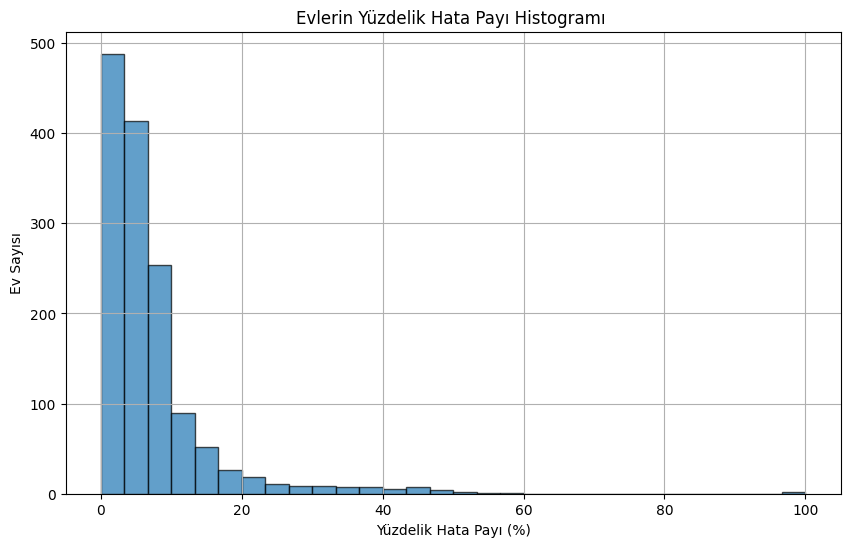

In [34]:
from matplotlib.ticker import MaxNLocator
# Calculate the percentage margin of error for each house
percentage_errors = np.abs((y_test - y_pred) / y_test) * 100

adjusted_percentage_errors = np.where(percentage_errors > 100, 100, percentage_errors)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(adjusted_percentage_errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Yüzdelik Hata Payı (%)')
plt.ylabel('Ev Sayısı')
plt.title('Evlerin Yüzdelik Hata Payı Histogramı (XGBoost) ')
plt.grid(True)
plt.show()

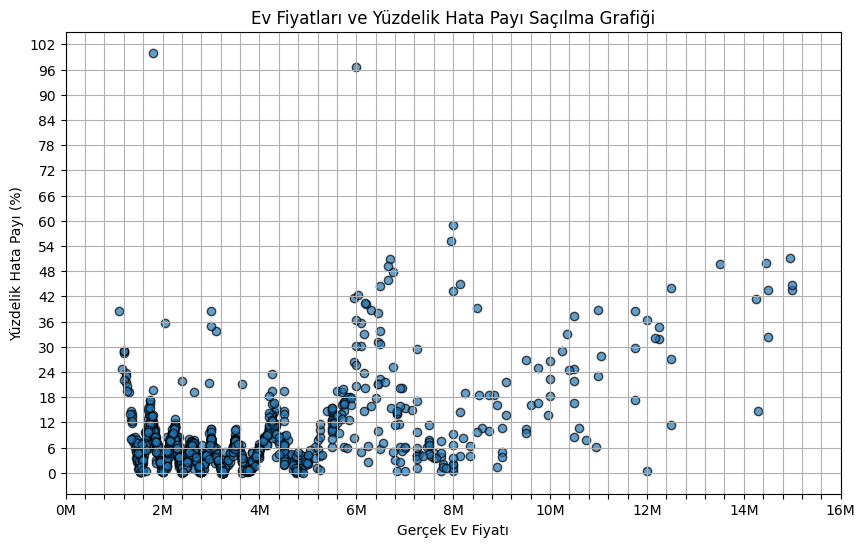

In [35]:
# Calculate the percentage margin of error for each house
percentage_errors = np.abs((y_test - y_pred) / y_test) * 100
adjusted_percentage_errors = np.where(percentage_errors > 100, 100, percentage_errors)

# Draw scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, adjusted_percentage_errors, alpha=0.7, edgecolor='k')
plt.xlabel('Gerçek Ev Fiyatı')
plt.ylabel('Yüzdelik Hata Payı (%)')
plt.title('Ev Fiyatları ve Yüzdelik Hata Payı Saçılma Grafiği (XGBoost)')
plt.grid(True)
# Format x-axis labels in millions
ticks, labels = plt.xticks()
plt.xticks(ticks, [f'{int(tick/1e6)}M' for tick in ticks])

# Creating ticks at narrower intervals on the X and Y axes
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=50))  
ax.yaxis.set_major_locator(MaxNLocator(nbins=20))

plt.show()

In [36]:
import numpy as np

# Calculate the percentage error for each house
percentage_errors = np.abs((y_test - y_pred) / y_test) * 100

# Limit the percentage errors to a maximum of 100
adjusted_percentage_errors = np.where(percentage_errors > 100, 100, percentage_errors)

# Define price range intervals
price_ranges = [(0, 2), (2, 4), (4, 6), (6, 8), (8, 10), (10, 12), (12, 14)]

# Define error thresholds
error_thresholds = [10, 20, 30, 40, 50]

# Initialize a matrix to store error percentages
error_matrix = np.zeros((len(price_ranges), len(error_thresholds)))

# Calculate error percentages for each price range and error threshold
for i, price_range in enumerate(price_ranges):
    filtered_indices = (y_test >= price_range[0] * 1e6) & (y_test < price_range[1] * 1e6)
    filtered_errors = adjusted_percentage_errors[filtered_indices]
    for j, threshold in enumerate(error_thresholds):
        error_matrix[i, j] = np.sum(filtered_errors < threshold) / len(filtered_errors) * 100

# Print the table
print("Price Range\t", end="")
for threshold in error_thresholds:
    print(f"<{threshold}% Error\t", end="")
print("\n---------------------XGBoost---------------------------")

for i, price_range in enumerate(price_ranges):
    price_range_label = f"{price_range[0]}-{price_range[1]}M"
    print(price_range_label, end="\t\t")
    for j, threshold in enumerate(error_thresholds):
        print(f"{error_matrix[i, j]:.2f}%\t\t", end="")
    print()


Price Range	<10% Error	<20% Error	<30% Error	<40% Error	<50% Error	
------------------------------------------------
0-2M		74.46%		95.24%		99.13%		99.57%		99.57%		
2-4M		97.08%		99.15%		99.51%		100.00%		100.00%		
4-6M		62.76%		98.47%		99.49%		99.49%		100.00%		
6-8M		47.13%		63.22%		77.01%		88.51%		96.55%		
8-10M		44.44%		80.56%		88.89%		91.67%		97.22%		
10-12M		19.05%		38.10%		80.95%		100.00%		100.00%		
12-14M		0.00%		12.50%		25.00%		75.00%		100.00%		


In [37]:
# Calculate the percentage error for each house
percentage_errors = np.abs((y_test - y_pred) / y_test) * 100

# Limit the percentage errors to a maximum of 100
adjusted_percentage_errors = np.where(percentage_errors > 100, 100, percentage_errors)

# Define price range intervals
price_ranges = [(0, 2), (2, 4), (4, 6), (6, 8), (8, 10), (10, 12), (12, 14)]

# Define error thresholds
error_thresholds = [10, 20, 30, 40, 50]

# Initialize a matrix to store error counts
count_matrix = np.zeros((len(price_ranges), len(error_thresholds)), dtype=int)

# Calculate error counts for each price range and error threshold
for i, price_range in enumerate(price_ranges):
    filtered_indices = (y_test >= price_range[0] * 1e6) & (y_test < price_range[1] * 1e6)
    filtered_errors = adjusted_percentage_errors[filtered_indices]
    for j, threshold in enumerate(error_thresholds):
        count_matrix[i, j] = np.sum(filtered_errors < threshold)

# Print the table
print("Price Range\t", end="")
for threshold in error_thresholds:
    print(f"<{threshold}% Error\t", end="")
print("\n--------------------XGBoost----------------------------")

for i, price_range in enumerate(price_ranges):
    price_range_label = f"{price_range[0]}-{price_range[1]}M"
    print(price_range_label, end="\t\t")
    for j, threshold in enumerate(error_thresholds):
        print(f"{count_matrix[i, j]} ev\t\t", end="")
    print()

Price Range	<10% Error	<20% Error	<30% Error	<40% Error	<50% Error	
------------------------------------------------
0-2M		172 ev		220 ev		229 ev		230 ev		230 ev		
2-4M		799 ev		816 ev		819 ev		823 ev		823 ev		
4-6M		123 ev		193 ev		195 ev		195 ev		196 ev		
6-8M		41 ev		55 ev		67 ev		77 ev		84 ev		
8-10M		16 ev		29 ev		32 ev		33 ev		35 ev		
10-12M		4 ev		8 ev		17 ev		21 ev		21 ev		
12-14M		0 ev		1 ev		2 ev		6 ev		8 ev		
